## This Analysis is based on Above Analysis.

- In this Analysis-:

- This is based on above analysis in this I have taken TOP 2 (TO & From) employees and target is 
  find who did the most communication with whom.
- Then will plot the number on bar graph in order to show top communication.
- Then will Analyse about them.

In [53]:
import os
import glob
import nltk
import re
import csv
from email.parser import Parser
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pylab as plt
import matplotlib.pyplot as plt

In [5]:
relativePath = os.getcwd()
path = relativePath+"/"+'midterm/data/ernon/maildir/'
to_email_list = []
topConList = []

### Step 1
- Data collection & Preparation

- I have read "ALL" folder of all Employees where the condition meet 
 (Give me 'TO' where from is ['shapiro', 'dasovich', 'mann', 'kaminski'] 
  these 4 is predicted on above analysis.).

In [6]:
# looped throug every employee and Each employee is looped through half of millions emails.
# 4 * 500,000 iterations.
# took around 30 mins.

def createEConList(to_email_list, employee):
    topCon = Counter(to_email_list).most_common(1)
    # Looping in order to assign rank to each word.
    for top in range(len(topCon)):
        obj1 = topCon[top]
        obj1 = obj1 + (employee,)
        topConList.append(obj1)



def emailParser(inputFile, employee, to_email_list):
    #print(employee)
    with open(inputFile, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
    global email_to
    if employee in email['From']:
        if not email['to'] == None:
            email_to = email['To'].replace("\n", "")
            email_to = email_to.replace("\t", "")
            email_to = email_to.replace(" ", "")
            email_to = email_to.split(",")
        
        for email_split in email_to:
            to_email_list.append(email_split)
    


empList = ['shapiro', 'dasovich', 'mann', 'kaminski']       
for employee in empList:
    to_email_list = []
    for directory, subDirectory, fileNames in os.walk(path):
        for filename in fileNames:
            emailParser(os.path.join(directory, filename), employee, to_email_list)
    createEConList(to_email_list , employee)
        


#### Step 3
- Data Preparation for BAR & PIE chart.

In [35]:
newList = []
i = 1
for x in range(len(topConList)):
    obj = topConList[x]
    obj = obj + (i,)
    y = list(obj)
    y[0], y[2] = y[2], y[0]
    y[1], y[2] = y[2], y[1]
    newObj = tuple(y)
    newList.append(newObj)
    i=i+1
print(newList)
    

[('shapiro', 'steven.kean@enron.com', 477, 1), ('dasovich', 'richard.shapiro@enron.com', 2916, 2), ('mann', 'suzanne.adams@enron.com', 1598, 3), ('kaminski', 'vkaminski@aol.com', 4867, 4)]


In [22]:
# creating CSV file that contains (Word, Frequency, Rank) sorted by Rank.
fileName = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Conversation/result/topCon.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Sender 1", "Sender 2", "Count", "Rank"])
    a.writerows(newList)

In [49]:
# Reading data from csv in order to ploton graph.

label = []
x = []
y = []
z = []
toFrom = []

# Reading CSV file in order to generate loglog figure.
with open(fileName,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        name = row[1].rsplit('.')[0]
        x.append(name)
        y.append(int(row[2]))
        z.append(int(row[3]))
        


for emp in range(len(x)):
    newName = label[emp] +" / "+ x[emp]
    toFrom.append(newName)
    


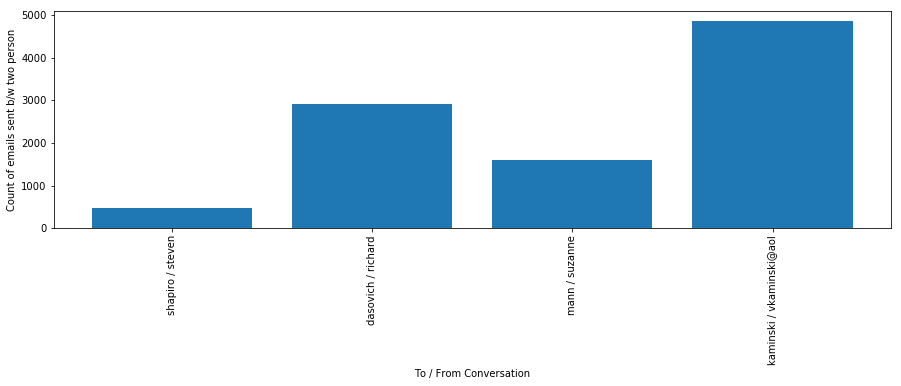

In [70]:
# storing figure in png file and stored in D drive.
pieFig = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Conversation/result/con.png'

plt.figure(figsize=(15,4))
plt.bar(z, y, align='center')
plt.xticks(z, toFrom, rotation=90)
plt.xlabel("To / From Conversation")
plt.ylabel("Count of emails sent b/w two person")
plt.savefig(pieFig, bbox_inches='tight')
plt.show()

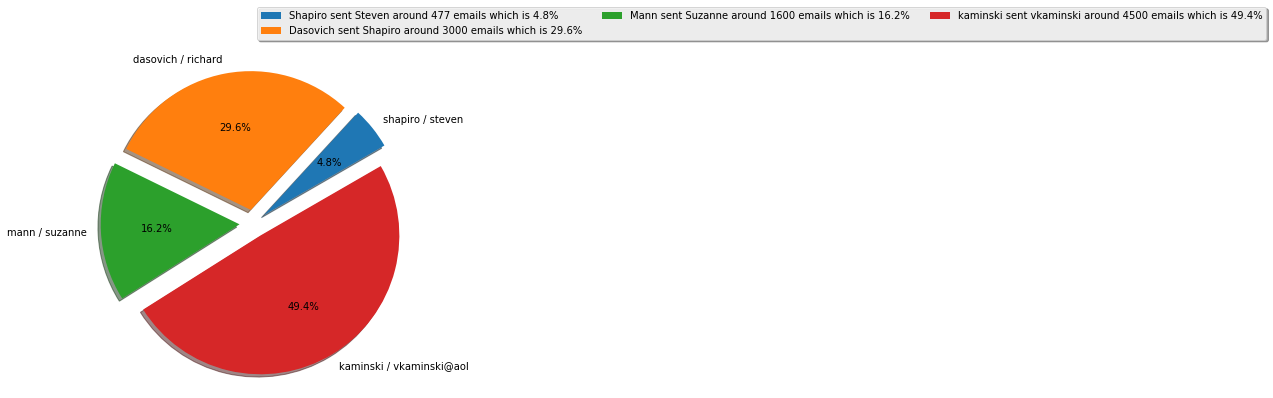

In [67]:
analysis = ["Shapiro sent Steven around 477 emails which is 4.8%", 
            "Dasovich sent Shapiro around 3000 emails which is 29.6%", 
            "Mann sent Suzanne around 1600 emails which is 16.2%", "kaminski sent vkaminski around 4500 emails which is 49.4%"]
pieFig1 = relativePath+"/"+'midterm/que[1-2]/ana_[1-3]/Top Conversation/result/percent.png'
explode = [0.1,0.1,0.1,0.1]
fig1, ax1 = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(6,6)
ax1.pie(y, explode=explode, labels=toFrom, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(analysis, loc="best", bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.savefig(pieFig1, bbox_inches='tight')
plt.show()

### Conclusion from above Analysis
- From above Bar Graph & Pie Chart We can say.
- Shapiro sent Steven around 477 emails which is 4.8%
- Dasovich sent Shapiro around 3000 emails which is 29.6%
- Mann sent Suzanne around 1600 emails which is 16.2
- kaminski sent vkaminski around 4500 emails which is 49.4%


### Final Conclusion
- As we know Shapiro recieved most number of emails in organization which was around 17000 from above we can see around 20% was sent from Dasovich.
- Mann recieved most emails but she was actively sending to other person and she was in TOP communication with Suzanne.

## This analysis is related to CEO of Enron "Kennath LAY"

In [73]:
empName = 'lay-k'
path = relativePath+"/"+'midterm/data/ernon/maildir/'+empName



def emailParser(inputFile, email_body):
    with open(inputFile, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
           
    email_body.append(email.get_payload())
    

email_body = []

for directory, subDirectory, fileNames in os.walk(path):
    for filename in fileNames:
        emailParser(os.path.join(directory, filename), email_body)
        


In [74]:
if os.path.isdir(relativePath+"/"+'midterm/data/') == 1:
    if os.path.isdir(relativePath+"/"+'midterm/data/kay-l/'+empName+'/') == 0: 
        os.makedirs(relativePath+"/"+'midterm/data/kay-l/'+empName+'/')
        
        
with open(relativePath+"/"+'midterm/data/kay-l/'+empName+'/emailMessage.txt', "w") as f:
    for emailBody in email_body:
        f.write(emailBody)
        f.write("\n")

In [75]:
with open(relativePath+"/"+'midterm/data/kay-l/'+empName+'/emailMessage.txt') as f:
    data = f.read()

cleanData = re.sub('[^A-Za-z]+', ' ', data)
words = word_tokenize(cleanData)

useful_words = [word.lower() for word in words if word not in stopwords.words('english')]
frequency = nltk.FreqDist(useful_words)
print(frequency.most_common(50))


[('enron', 24394), ('i', 14213), ('com', 11637), ('the', 7975), ('company', 6504), ('energy', 5833), ('employees', 5288), ('please', 5129), ('lay', 4616), ('to', 4479), ('e', 4209), ('new', 4189), ('made', 4019), ('would', 3946), ('california', 3803), ('ken', 3554), ('consumers', 3468), ('www', 3377), ('http', 3245), ('we', 3145), ('ect', 3031), ('business', 2939), ('million', 2931), ('mr', 2794), ('stock', 2757), ('development', 2704), ('us', 2684), ('year', 2657), ('mail', 2520), ('org', 2515), ('pay', 2511), ('time', 2450), ('funds', 2405), ('information', 2335), ('retirement', 2333), ('corp', 2332), ('millions', 2312), ('bills', 2304), ('bankruptcy', 2300), ('donate', 2269), ('declared', 2253), ('as', 2250), ('help', 2250), ('meeting', 2233), ('last', 2178), ('know', 2138), ('subject', 2135), ('well', 2114), ('houston', 2099), ('many', 2077)]


## Analysis on Above Result
- The Above result showing Top 50 words that was used in Kenneth Lay emails.
- After seeing this we can predict:
    - Words like "Energy and Communication" are expected, as that's what Ernon did.
    - Words like "Million, Millions, Stocks, and Bankruptcy" are occured which shows Kenneth was aware was this.
    - The word "California" is used more than 3000 times means Company had some bad history there.
    - The word "Meeting" is used more than 2000 times which shows Kenneth was the busy man.
